# Exercise 07.1

Using the Monte Carlo NVT code, we printed out instantaneous values of of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

With the following python script we compute the autocorrelation functions of the time series of the potential energy and pressure in the solid, liquid and gas phases. 

$$
\chi (t) = \frac{\langle m(t')m(t'+t) \rangle_{t'} - \langle m \rangle^2}{\sigma^2_m}  =\frac {\frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t}m(t')m(t'+t)- \frac{1}{t_{max}-t} \sum_{t'=0}^{t_{max}-t}m(t') \cdot \frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t'+t) }{\frac{1}{t_{max}} \sum_{t'=0}^{t_{max}}m^2(t')- \big(\frac{1}{t_{max}} \sum_{t'=0}^{t_{max}}m(t')\big)^2}
$$

We plot the autocorrelation functions with the relative exponential fit $\chi (t) \sim e^{-t/t_c}$, where $t_c$ is the correlation time of the time series. In our simulations block must be longer than $2t_c$ MC steps in order to avoid correlations.

<span style="color:red"> Attention:</span> Each of the following python scripts takes a few minutes to compute the autocorrelation functions.

299/300

Energy autocorrelation:
optimized parameters [a,b] =
[0.83400073 0.1102267 ]
parameters uncertainty =
[0.00807481 0.00159317]
Correlation time =  9.072212138230912


Pressure autocorrelation:
optimized parameters [a,b] =
[0.8961696  0.11267957]
parameters uncertainty =
[0.00847459 0.00159257]
Correlation time =  8.874723198315401


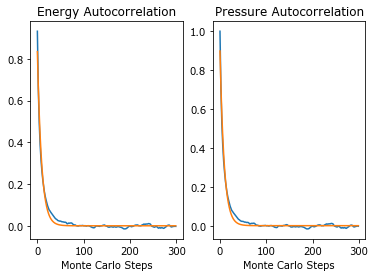

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sys

def f(x,a,b):
    return a * np.exp(-b*x)

step, ene = np.loadtxt("Ex_07/solid/inst_energy_solid.txt",usecols=(0,1), delimiter='\t', unpack='true')
press = np.loadtxt("Ex_07/solid/inst_pressure_solid.txt",usecols=(1), delimiter='\t', unpack='true')

tmax=300

iu=0
ip=1
c1=np.zeros(2)
c2=np.zeros(2)
autocorrelation_u = np.zeros(tmax)
autocorrelation_p = np.zeros(tmax)


for t in range(0,100000):
    c1[iu] += ene[t]**2
    c2[iu] +=ene[t]
    c1[ip] += press[t]**2
    c2[ip] +=press[t]

sigma_2_u = 1/len(step)*c1[iu] - (1/len(step)*c2[iu])**2
sigma_2_p = 1/len(step)*c1[ip] - (1/len(step)*c2[ip])**2


for t in range(0,tmax):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write(str(t)+"/"+str(tmax))
    sys.stdout.flush()
    c3=np.zeros(2)
    c4=np.zeros(2)
    c5=np.zeros(2)
    delta=len(step)-t
    for tt in range(0,delta):
        c3[iu] += ene[tt]*ene[tt+t]
        c4[iu] += ene[tt]
        c5[iu] += ene[tt+t]
        c3[ip] += press[tt]*press[tt+t]
        c4[ip] += press[tt]
        c5[ip] += press[tt+t]


    autocorrelation_u[t] = (1/delta*c3[iu] -1/(delta**2)*c4[iu]*c5[iu])/sigma_2_u
    autocorrelation_p[t] = (1/delta*c3[ip] -1/(delta**2)*c4[ip]*c5[ip])/sigma_2_p


x = np.arange(tmax)
#print(autocorrelation)

fig, axarr = plt.subplots(1,2)

axarr[0].plot(x, autocorrelation_u)
p_opt_u, p_cov_u = curve_fit(f, x, autocorrelation_u) #, bounds=([0,0,-1],[2,3,+3]))
y_fit_u = f(x,p_opt_u[0],p_opt_u[1])
axarr[0].plot(x,y_fit_u) # plotting fitted function
axarr[0].set(title="Energy Autocorrelation")
axarr[0].set(xlabel="Monte Carlo Steps")

axarr[1].plot(x, autocorrelation_p)
p_opt_p, p_cov_p = curve_fit(f, x, autocorrelation_p) #, bounds=([0,0,-1],[2,3,+3]))
y_fit_p = f(x,p_opt_p[0],p_opt_p[1])
axarr[1].plot(x,y_fit_p) # plotting fitted function
axarr[1].set(title="Pressure Autocorrelation")
axarr[1].set(xlabel="Monte Carlo Steps")

print("\n")
print("Energy autocorrelation:")
print("optimized parameters [a,b] =")
print(p_opt_u)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov_u)))
tc = 1/p_opt_u[1]
print("Correlation time = ", tc)

print("\n")
print("Pressure autocorrelation:")
print("optimized parameters [a,b] =")
print(p_opt_p)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov_p)))
tc = 1/p_opt_p[1]
print("Correlation time = ", tc)

plt.show()


299/300

Energy autocorrelation:
optimized parameters [a,b] =
[0.65919337 0.05701723]
parameters uncertainty =
[0.01770276 0.00222754]
Correlation time =  17.53855928694678


Pressure autocorrelation:
optimized parameters [a,b] =
[0.64388648 0.0389474 ]
parameters uncertainty =
[0.01542777 0.00134555]
Correlation time =  25.675656587382566


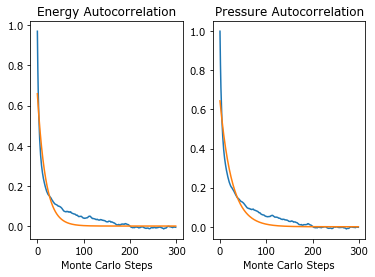

In [17]:
step, ene = np.loadtxt("Ex_07/liquid/inst_energy_liquid.txt",usecols=(0,1), delimiter='\t', unpack='true')
press = np.loadtxt("Ex_07/liquid/inst_pressure_liquid.txt",usecols=(1), delimiter='\t', unpack='true')

tmax=300

iu=0
ip=1
c1=np.zeros(2)
c2=np.zeros(2)
autocorrelation_u = np.zeros(tmax)
autocorrelation_p = np.zeros(tmax)


for t in range(0,100000):
    c1[iu] += ene[t]**2
    c2[iu] +=ene[t]
    c1[ip] += press[t]**2
    c2[ip] +=press[t]

sigma_2_u = 1/len(step)*c1[iu] - (1/len(step)*c2[iu])**2
sigma_2_p = 1/len(step)*c1[ip] - (1/len(step)*c2[ip])**2


for t in range(0,tmax):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write(str(t)+"/"+str(tmax))
    sys.stdout.flush()
    c3=np.zeros(2)
    c4=np.zeros(2)
    c5=np.zeros(2)
    delta=len(step)-t
    for tt in range(0,delta):
        c3[iu] += ene[tt]*ene[tt+t]
        c4[iu] += ene[tt]
        c5[iu] += ene[tt+t]
        c3[ip] += press[tt]*press[tt+t]
        c4[ip] += press[tt]
        c5[ip] += press[tt+t]


    autocorrelation_u[t] = (1/delta*c3[iu] -1/(delta**2)*c4[iu]*c5[iu])/sigma_2_u
    autocorrelation_p[t] = (1/delta*c3[ip] -1/(delta**2)*c4[ip]*c5[ip])/sigma_2_p


x = np.arange(tmax)
#print(autocorrelation)

fig, axarr = plt.subplots(1,2)

axarr[0].plot(x, autocorrelation_u)
p_opt_u, p_cov_u = curve_fit(f, x, autocorrelation_u) #, bounds=([0,0,-1],[2,3,+3]))
y_fit_u = f(x,p_opt_u[0],p_opt_u[1])
axarr[0].plot(x,y_fit_u) # plotting fitted function
axarr[0].set(title="Energy Autocorrelation")
axarr[0].set(xlabel="Monte Carlo Steps")

axarr[1].plot(x, autocorrelation_p)
p_opt_p, p_cov_p = curve_fit(f, x, autocorrelation_p) #, bounds=([0,0,-1],[2,3,+3]))
y_fit_p = f(x,p_opt_p[0],p_opt_p[1])
axarr[1].plot(x,y_fit_p) # plotting fitted function
axarr[1].set(title="Pressure Autocorrelation")
axarr[1].set(xlabel="Monte Carlo Steps")

print("\n")
print("Energy autocorrelation:")
print("optimized parameters [a,b] =")
print(p_opt_u)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov_u)))
tc = 1/p_opt_u[1]
print("Correlation time = ", tc)

print("\n")
print("Pressure autocorrelation:")
print("optimized parameters [a,b] =")
print(p_opt_p)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov_p)))
tc = 1/p_opt_p[1]
print("Correlation time = ", tc)

plt.show()



299/300

Energy autocorrelation:
optimized parameters [a,b] =
[0.93331844 0.29907172]
parameters uncertainty =
[0.0094907  0.00495896]
Correlation time =  3.3436796226809573


Pressure autocorrelation:
optimized parameters [a,b] =
[0.99773243 1.15152939]
parameters uncertainty =
[0.00375319 0.01021096]
Correlation time =  0.8684103184034743


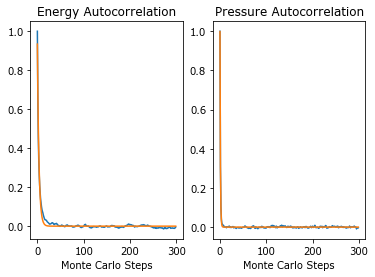

In [18]:
step, ene = np.loadtxt("Ex_07/gas/inst_energy_gas.txt",usecols=(0,1), delimiter='\t', unpack='true')
press = np.loadtxt("Ex_07/gas/inst_pressure_gas.txt",usecols=(1), delimiter='\t', unpack='true')

tmax=300

iu=0
ip=1
c1=np.zeros(2)
c2=np.zeros(2)
autocorrelation_u = np.zeros(tmax)
autocorrelation_p = np.zeros(tmax)


for t in range(0,100000):
    c1[iu] += ene[t]**2
    c2[iu] +=ene[t]
    c1[ip] += press[t]**2
    c2[ip] +=press[t]

sigma_2_u = 1/len(step)*c1[iu] - (1/len(step)*c2[iu])**2
sigma_2_p = 1/len(step)*c1[ip] - (1/len(step)*c2[ip])**2


for t in range(0,tmax):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write(str(t)+"/"+str(tmax))
    sys.stdout.flush()
    c3=np.zeros(2)
    c4=np.zeros(2)
    c5=np.zeros(2)
    delta=len(step)-t
    for tt in range(0,delta):
        c3[iu] += ene[tt]*ene[tt+t]
        c4[iu] += ene[tt]
        c5[iu] += ene[tt+t]
        c3[ip] += press[tt]*press[tt+t]
        c4[ip] += press[tt]
        c5[ip] += press[tt+t]


    autocorrelation_u[t] = (1/delta*c3[iu] -1/(delta**2)*c4[iu]*c5[iu])/sigma_2_u
    autocorrelation_p[t] = (1/delta*c3[ip] -1/(delta**2)*c4[ip]*c5[ip])/sigma_2_p


x = np.arange(tmax)
#print(autocorrelation)

fig, axarr = plt.subplots(1,2)

axarr[0].plot(x, autocorrelation_u)
p_opt_u, p_cov_u = curve_fit(f, x, autocorrelation_u) #, bounds=([0,0,-1],[2,3,+3]))
y_fit_u = f(x,p_opt_u[0],p_opt_u[1])
axarr[0].plot(x,y_fit_u) # plotting fitted function
axarr[0].set(title="Energy Autocorrelation")
axarr[0].set(xlabel="Monte Carlo Steps")

axarr[1].plot(x, autocorrelation_p)
p_opt_p, p_cov_p = curve_fit(f, x, autocorrelation_p) #, bounds=([0,0,-1],[2,3,+3]))
y_fit_p = f(x,p_opt_p[0],p_opt_p[1])
axarr[1].plot(x,y_fit_p) # plotting fitted function
axarr[1].set(title="Pressure Autocorrelation")
axarr[1].set(xlabel="Monte Carlo Steps")

print("\n")
print("Energy autocorrelation:")
print("optimized parameters [a,b] =")
print(p_opt_u)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov_u)))
tc = 1/p_opt_u[1]
print("Correlation time = ", tc)

print("\n")
print("Pressure autocorrelation:")
print("optimized parameters [a,b] =")
print(p_opt_p)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov_p)))
tc = 1/p_opt_p[1]
print("Correlation time = ", tc)

plt.show()



In summary in order to avoid correlations the minimum length of the blocks must be:
- solid phase: $L \sim 20$
- liquid phase: $L \sim 50$
- gas phase: $L \sim 7$

Regarding the liquid phase the tails of the autocorrelation function are bad. That's way we have a bad exponential fit. 


# Exercise 07.4

We plot the potential energy per particle, the pressure and the radial distribution function with their uncertainties in SI units for:
- liquid Argon
- solid Argon
- gas Argon

Our Monte Carlo and Molecular Dynamics simulations are characterized by $20$ blocks and $2000$ steps for each block.
Pictures for Krypton are the exactly the same properly rescaled. 

<span style="color:green">**Liquid Argon**</span>

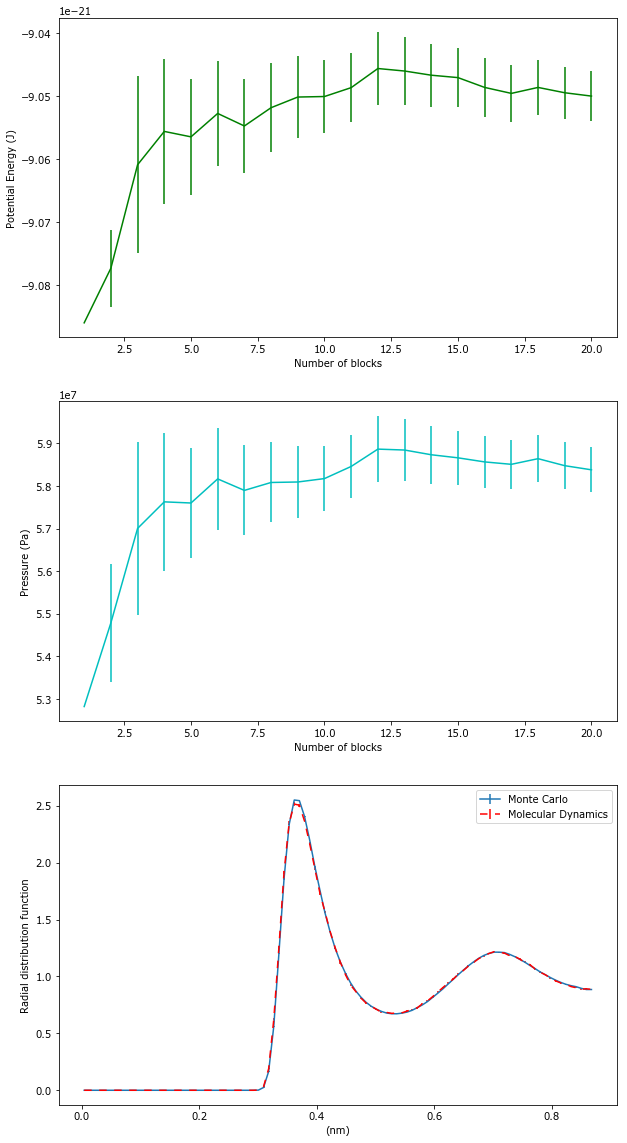

In [49]:
blk, pr, err_pr = np.loadtxt("Ex_07/Figures/Liq_output.pres.0", usecols=(0,2,3), unpack='true')
epot, err_epot = np.loadtxt("Ex_07/Figures/Liq_output.epot.0", usecols=(2,3), unpack='true')
x_mc, gofr_mc, err_mc = np.loadtxt("Ex_07/Figures/Liq_output.gave.0",usecols=(0,1,2), unpack='true')
x_md, gofr_md, err_md = np.loadtxt("MD/Figures/Liq_output.gave.0",usecols=(0,1,2), unpack='true')

k_b=1.38*10**(-23)
eps_arg=120
eps_kr=164
sigma_arg=0.34
sigma_kr=0.364

#ARGON
epot *= eps_arg*k_b
err_epot *= eps_arg*k_b
pr *= (eps_arg*k_b/sigma_arg**3)*10**(27)
err_pr *= (eps_arg*k_b/sigma_arg**3)*10**(27)
x_mc *= sigma_arg
x_md *= sigma_arg

f, axarr = plt.subplots(3,1, figsize=(10,20))

axarr[0].errorbar(blk,epot,yerr=err_epot, color='g')
axarr[0].set(xlabel='Number of blocks')
axarr[0].set(ylabel='Potential Energy (J)')

axarr[1].errorbar(blk,pr,yerr=err_pr, color='c')
axarr[1].set(xlabel='Number of blocks')
axarr[1].set(ylabel='Pressure (Pa)')

axarr[2].errorbar(x_mc,gofr_mc,yerr=err_mc, label='Monte Carlo')
axarr[2].errorbar(x_md,gofr_md,yerr=err_md, color='r', linestyle =(0,(5,5)),label='Molecular Dynamics')
axarr[2].set(xlabel='(nm)')
axarr[2].set(ylabel='Radial distribution function')

axarr[2].legend()

plt.show()

<span style="color:green">**Solid Argon**</span>

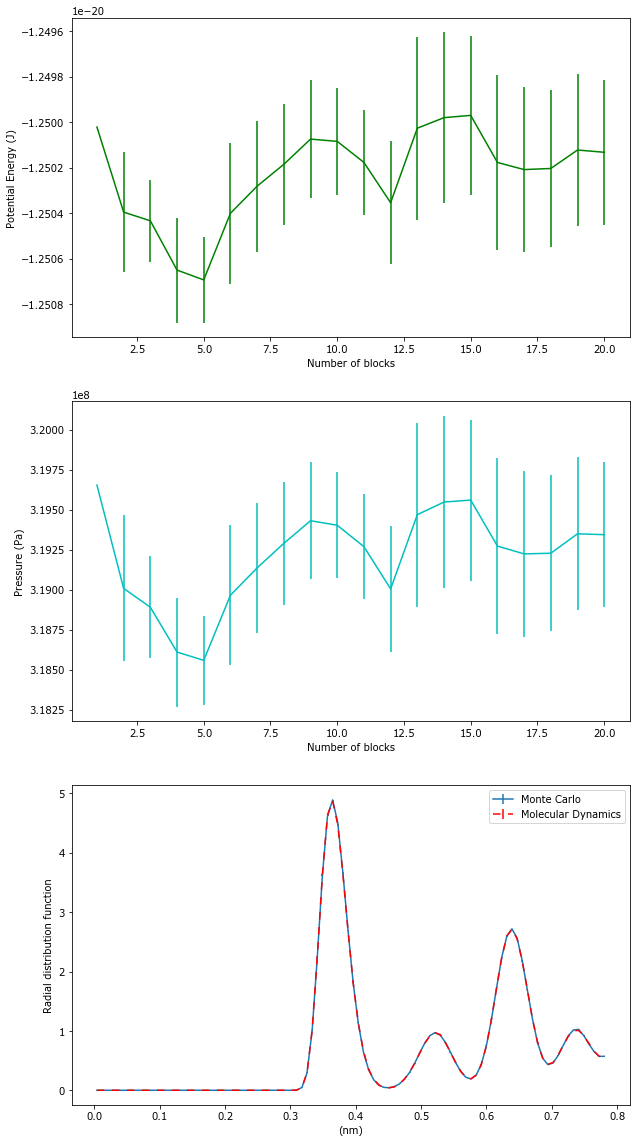

In [50]:
blk, pr, err_pr = np.loadtxt("Ex_07/Figures/Sol_output.pres.0", usecols=(0,2,3), unpack='true')
epot, err_epot = np.loadtxt("Ex_07/Figures/Sol_output.epot.0", usecols=(2,3), unpack='true')
x_mc, gofr_mc, err_mc = np.loadtxt("Ex_07/Figures/Sol_output.gave.0",usecols=(0,1,2), unpack='true')
x_md, gofr_md, err_md = np.loadtxt("MD/Figures/Sol_output.gave.0",usecols=(0,1,2), unpack='true')

k_b=1.38*10**(-23)
eps_arg=120
eps_kr=164
sigma_arg=0.34
sigma_kr=0.364

#ARGON
epot *= eps_arg*k_b
err_epot *= eps_arg*k_b
pr *= (eps_arg*k_b/sigma_arg**3)*10**(27)
err_pr *= (eps_arg*k_b/sigma_arg**3)*10**(27)
x_mc *= sigma_arg
x_md *= sigma_arg

f, axarr = plt.subplots(3,1, figsize=(10,20))

axarr[0].errorbar(blk,epot,yerr=err_epot, color='g')
axarr[0].set(xlabel='Number of blocks')
axarr[0].set(ylabel='Potential Energy (J)')

axarr[1].errorbar(blk,pr,yerr=err_pr, color='c')
axarr[1].set(xlabel='Number of blocks')
axarr[1].set(ylabel='Pressure (Pa)')

axarr[2].errorbar(x_mc,gofr_mc,yerr=err_mc, label='Monte Carlo')
axarr[2].errorbar(x_md,gofr_md,yerr=err_md, color='r', linestyle =(0,(5,5)),label='Molecular Dynamics')
axarr[2].set(xlabel='(nm)')
axarr[2].set(ylabel='Radial distribution function')

axarr[2].legend()

plt.show()

<span style="color:green">**Gas Argon**</span>

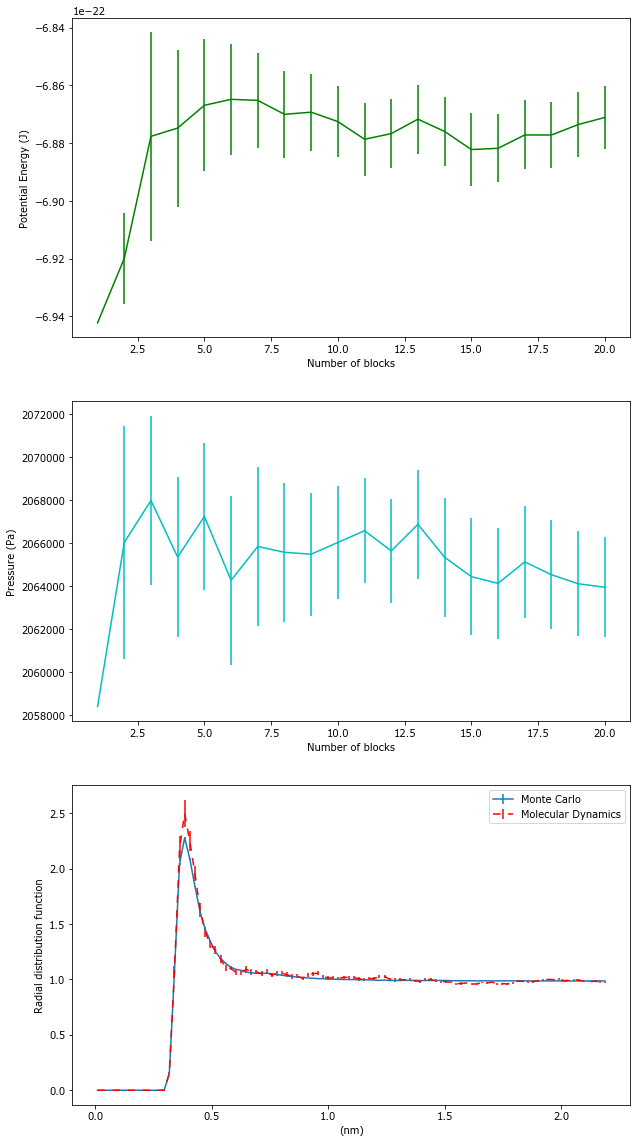

In [51]:
blk, pr, err_pr = np.loadtxt("Ex_07/Figures/Gas_output.pres.0", usecols=(0,2,3), unpack='true')
epot, err_epot = np.loadtxt("Ex_07/Figures/Gas_output.epot.0", usecols=(2,3), unpack='true')
x_mc, gofr_mc, err_mc = np.loadtxt("Ex_07/Figures/Gas_output.gave.0",usecols=(0,1,2), unpack='true')
x_md, gofr_md, err_md = np.loadtxt("MD/Figures/Gas_output.gave.0",usecols=(0,1,2), unpack='true')

k_b=1.38*10**(-23)
eps_arg=120
eps_kr=164
sigma_arg=0.34
sigma_kr=0.364

#ARGON
epot *= eps_arg*k_b
err_epot *= eps_arg*k_b
pr *= (eps_arg*k_b/sigma_arg**3)*10**(27)
err_pr *= (eps_arg*k_b/sigma_arg**3)*10**(27)
x_mc *= sigma_arg
x_md *= sigma_arg

f, axarr = plt.subplots(3,1, figsize=(10,20))

axarr[0].errorbar(blk,epot,yerr=err_epot, color='g')
axarr[0].set(xlabel='Number of blocks')
axarr[0].set(ylabel='Potential Energy (J)')

axarr[1].errorbar(blk,pr,yerr=err_pr, color='c')
axarr[1].set(xlabel='Number of blocks')
axarr[1].set(ylabel='Pressure (Pa)')

axarr[2].errorbar(x_mc,gofr_mc,yerr=err_mc, label='Monte Carlo')
axarr[2].errorbar(x_md,gofr_md,yerr=err_md, color='r', linestyle =(0,(5,5)),label='Molecular Dynamics')
axarr[2].set(xlabel='(nm)')
axarr[2].set(ylabel='Radial distribution function')

axarr[2].legend()

plt.show()

In each of the three phases the measurements of the radial distribution function using a Monte Carlo algorithm and a Molecular Dynamics algorithm perfectly agree.